In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display


In [4]:
PATH_ELE="../Dati/InterCalibrazione.xlsx"
PATH_MARTI="../InterCalibrazione-2.xlsx"
data=pd.read_excel(PATH_MARTI, sheet_name='batch2' )
display(data)

,ch,val_1,err_stat_1,val_2,err_stat_2,val_3,err_stat_3,val_4,err_stat_4,val_5,err_stat_5,media,std,drift relativo,Drift relativo [%],Range,val_6,err_stat_6
0,0.0,-630.4,1.3,-630.7,1.10,-629.0,1.30,-632.22,0.90,-632.50,1.10,-630.964,0.167332,0.000265,0.026520,L,-632.70,1.12
1,1.0,-590.4,1.1,-590.0,1.20,-586.0,1.30,-589.20,1.30,-589.10,1.00,-588.940,0.130384,0.000221,0.022139,NaN,-591.12,1.31
2,2.0,-2290.9,1.6,-2298.0,1.20,-2298.0,1.20,-2299.40,1.50,-2293.60,1.40,-2295.980,0.178885,0.000078,0.007791,L,-2295.01,1.47
3,3.0,-1413.0,2.0,-1409.1,1.50,-1405.0,1.80,-1414.00,1.70,-1413.80,1.50,-1410.980,0.212132,0.000150,0.015034,H,-1412.10,1.68
4,4.0,-950.5,1.1,-946.6,1.30,-947.0,1.10,-951.00,1.20,-949.60,1.00,-948.940,0.114018,0.000120,0.012015,H,-952.76,2.00
5,5.0,-1576.9,2.5,-1584.6,2.00,-1585.0,2.30,-1582.70,2.20,-1583.20,2.40,-1582.480,0.192354,0.000122,0.012155,H,-1582.80,2.90
6,6.0,-1064.1,1.5,-1063.7,1.40,-1062.7,1.60,-1068.10,1.60,-1058.10,1.50,-1063.340,0.083666,0.000079,0.007868,L,-1063.49,1.89
7,7.0,-1576.6,1.9,-1581.1,2.10,-1580.0,2.00,-1578.70,1.80,-1573.70,1.70,-1578.020,0.158114,0.000100,0.010020,H,-1582.58,1.60
8,8.0,-1226.7,2.9,-1229.0,3.00,-1239.3,3.00,-1234.50,3.50,-1235.50,2.30,-1233.000,0.427785,0.000347,0.034695,H,-1234.51,2.21
9,9.0,-671.3,1.0,-670.9,1.00,-672.1,1.10,-672.90,1.00,-668.02,0.84,-671.044,0.093381,0.000139,0.013916,NaN,-672.83,0.82


In [7]:
a=data["err_stat_1"][2]
print(type(a))

<class 'numpy.float64'>


In [7]:
channels = [0, 1,2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12,14, 15]
channel_idx = [0,  1, 2, 3, 4, 5, 6, 7,  8, 9,  10, 11, 12, -1, 13,14]

ch=np.zeros((15,6))
ch_err=np.zeros((15,6))

for j in channels:
    print(j)
    for i in range(0,6):
        
        ch[channel_idx[j]][i] = data["val_"+str(i+1)][j]
        ch_err[channel_idx[j]][i] = data["err_stat_"+str(i+1)][j]

print(ch)

0
1
2
3
4
5
6
7
8
9
10
11
12
14
15
[[ -630.4   -630.7   -629.    -632.22  -632.5   -632.7 ]
 [ -590.4   -590.    -586.    -589.2   -589.1   -591.12]
 [-2290.9  -2298.   -2298.   -2299.4  -2293.6  -2295.01]
 [-1413.   -1409.1  -1405.   -1414.   -1413.8  -1412.1 ]
 [ -950.5   -946.6   -947.    -951.    -949.6   -952.76]
 [-1576.9  -1584.6  -1585.   -1582.7  -1583.2  -1582.8 ]
 [-1064.1  -1063.7  -1062.7  -1068.1  -1058.1  -1063.49]
 [-1576.6  -1581.1  -1580.   -1578.7  -1573.7  -1582.58]
 [-1226.7  -1229.   -1239.3  -1234.5  -1235.5  -1234.51]
 [ -671.3   -670.9   -672.1   -672.9   -668.02  -672.83]
 [ -550.1   -550.4   -551.8   -549.57  -551.13  -551.96]
 [ -859.3   -859.4   -855.    -860.2   -862.8   -857.91]
 [ -831.7   -829.9   -830.6   -826.    -826.4   -824.32]
 [-1437.9  -1434.5  -1436.8  -1435.3  -1435.8  -1435.02]
 [-2003.1  -2004.2  -2009.3  -2004.   -2005.6  -2004.21]]


In [9]:
print(ch[0])

[-312.74 -312.4  -312.9  -309.05 -310.17]


0
1
2
3
4
5
6
7
8
9
10
11
12


IndexError: list index out of range

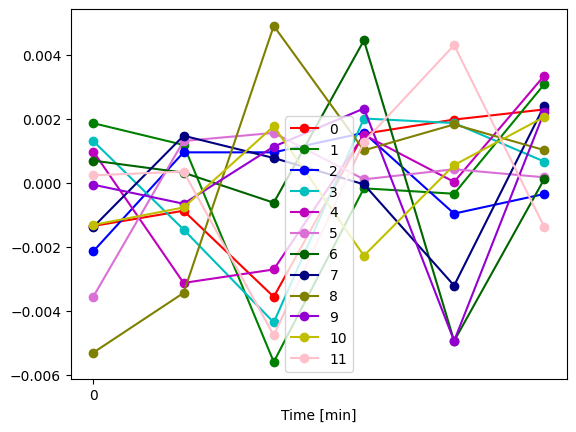

In [8]:


colors=['r', 'g', 'b', 'c', 'm', 'orchid', 'darkgreen', 'navy', 'olive', 'darkviolet', 'y', 'pink' ]

plt.xticks([0, 30, 60, 90, 120, 150])
plt.xlabel("Time [min]")


for j in channels:
    print(j)
    plt.plot(np.arange(6) * 2, (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', color=colors[channel_idx[j]], label='{}'.format(j))
    plt.legend()
#plt.plot(np.arange(4)*2, np.array(ch[channel_idx[7]]-np.array(ch[channel_idx[7]]))/np.mean(ch[channel_idx[7]]), '-o')
#plt.plot(np.arange(4)*2, np.array(ch[channel_idx[15]])/np.mean(ch[channel_idx[15]]), '-o')

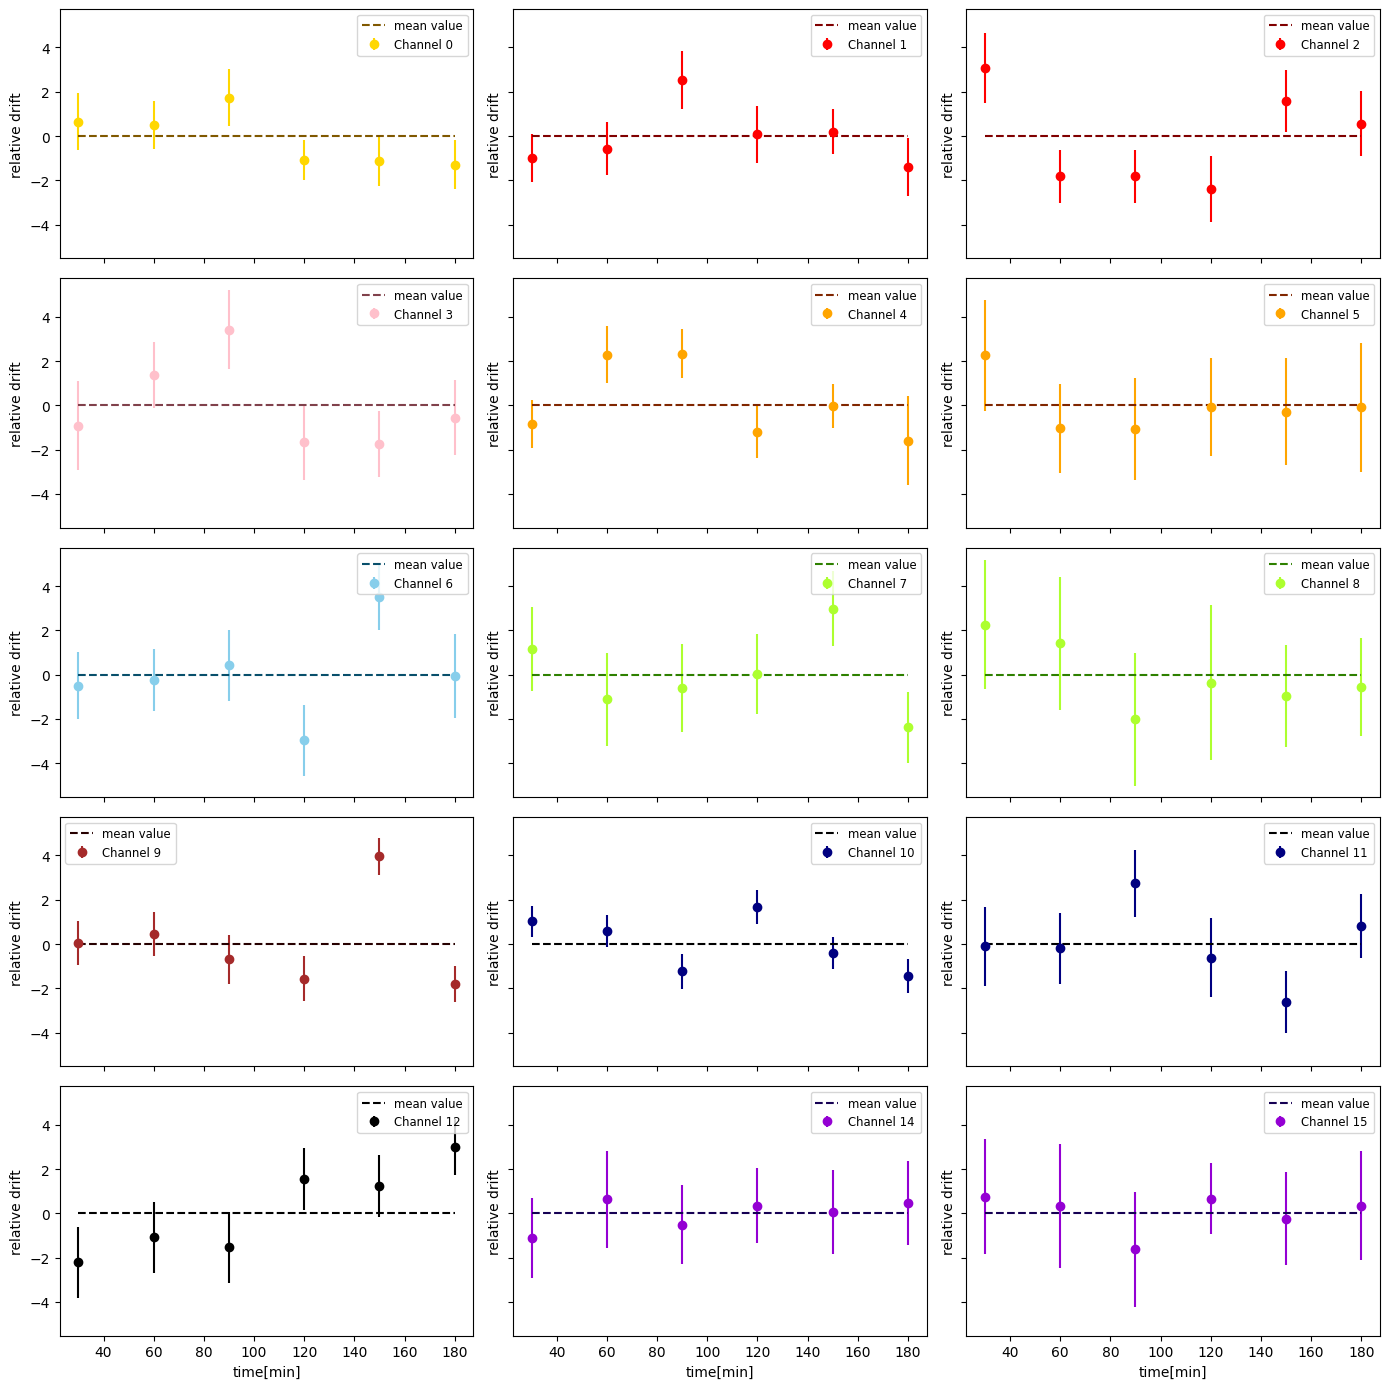

In [34]:
# Define drift list
#drift = [4, 6, 7, 8]

import matplotlib.colors as mcolors

channels = [0, 1, 2, 3, 4, 5, 6, 7, 8,9, 10, 11, 12, 14, 15]
xval=np.array([ 30, 60, 90, 120, 150, 180])

# Define colors for each subplot
colors = ['gold', 'red', 'red', 'pink', 'orange', 'orange', 'skyblue', 'greenyellow', 'greenyellow', 'brown', 'navy', 'navy', 'black', 'darkviolet', 'darkviolet' ]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 14), sharex=True, sharey=True)

# Iterate over each element in channels
for idx, (j, color) in enumerate(zip(channels, colors)):
    # Calculate subplot row and column
    row = idx // 3
    col = idx % 3
    
    # Plot error bars on the corresponding subplot with different color
    axes[row, col].errorbar(np.arange(6) * 30 + 30, (ch[channel_idx[j]]-np.mean(ch[channel_idx[j]]))/ch_err[channel_idx[j]], yerr=ch_err[channel_idx[j]], ls='', marker='o', color=color, label='Channel {}'.format(j))

    dark_color = mcolors.to_rgb(color)
    dark_color = [max(0, c - 0.5) for c in dark_color]  

    axes[row, col].plot(xval, 0*xval , ls='--', color=dark_color, label = 'mean value')
    #axes[row, col].set_xlabel('time [h]')  # Add x label for each subplot
    axes[row, col].set_ylabel('relative drift')
    axes[row, col].legend(fontsize='small')  # Add legend for each subplot
    
   # axes[row, col].set_title('Channel {}'.format(j))  # Set title for each subplot

axes[-1, 0].set_xlabel('time[min]') 
axes[-1, 1].set_xlabel('time[min]') 
axes[-1, 2].set_xlabel('time[min]') 
# Adjust layout
plt.tight_layout()

# Show the plot

plt.savefig("drift.pdf")


(-15.0, 25.0)

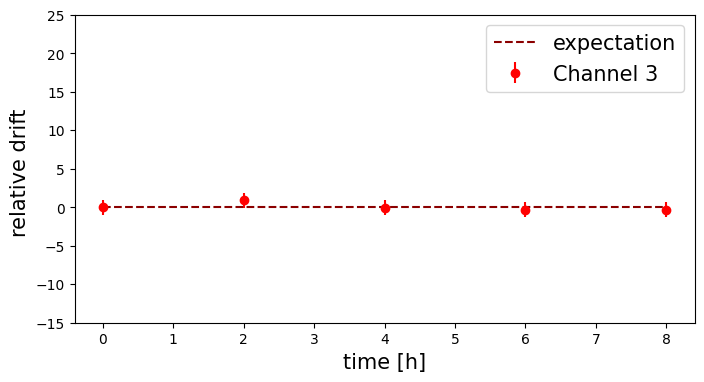

In [43]:
plt.figure(figsize=(8,4))
plt.errorbar(np.arange(5) * 2, (ch[channel_idx[3]]-np.mean(ch[channel_idx[3]]))/ch_err[channel_idx[3]], yerr=1, ls='', marker='o', color='red', label='Channel 3')
plt.plot(xval, 0*xval, ls='--', color='darkred', label = 'expectation')
 #axes[row, col].set_xlabel('time [h]')  # Add x label for each subplot
plt.ylabel('relative drift ', fontsize=15)
plt.xlabel('time [h]', fontsize=15)
plt.legend(fontsize=15) 
plt.ylim(-15,25) 

<class 'list'>


In [41]:
list=[0,2,3,4,5,6,7,8,10,11,14,15]
for i in list:
    a=(ch[channel_idx[i]]-np.mean(ch[channel_idx[i]]))/ch_err[channel_idx[i]]
    print(i, np.std(a))


0 1.0681302252687197
2 0.8288745040691917
3 0.448893301432709
4 5.747527694417533
5 0.8119743136430563
6 0.9096090148778839
7 8.833812148332791
8 9.712170202661543
10 0.8779946202162912
11 1.6386750182870842
14 1.5924618472490735
15 0.5201238751961283


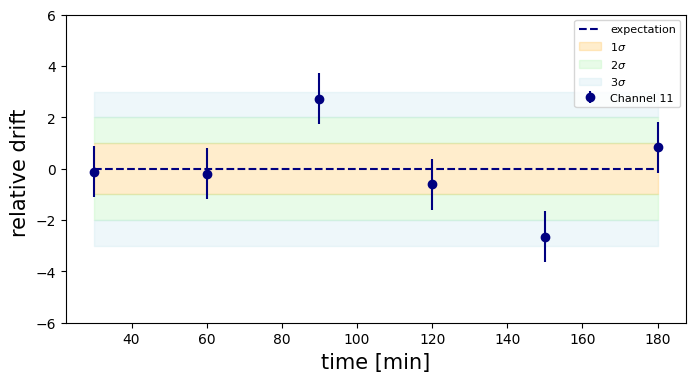

In [36]:
plt.figure(figsize=(8,4))
plt.errorbar(np.arange(6) * 30+30, (ch[channel_idx[11]]-np.mean(ch[channel_idx[11]]))/ch_err[channel_idx[11]], yerr=1,ls='', marker='o', color='navy', label='Channel 11')
plt.plot(xval, 0*xval , ls='--', color='navy', label = 'expectation')
plt.fill_between([30,180], [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
plt.fill_between([30,180], [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
plt.fill_between([30,180], [2, 2], [1, 1], color = "lightgreen", alpha = 0.2)
plt.fill_between([30,180], [-3, -3], [-2, -2], color = "lightblue", alpha = 0.2, label = r'$3\sigma$')
plt.fill_between([30,180], [3, 3], [2, 2], color = "lightblue", alpha = 0.2)
 #axes[row, col].set_xlabel('time [h]')  # Add x label for each subplot
plt.ylabel('relative drift ', fontsize=15)
plt.ylim(-6,6)
plt.xlabel('time [min]', fontsize=15)
plt.legend(fontsize=8)  


4
6
7
8


/var/folders/17/9cj0cbps58xbmrl2zpj6hv2h0000gn/T/ipykernel_50017/484183505.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(np.arange(5) * 2,  (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', marker='o',label='{}'.format(j))


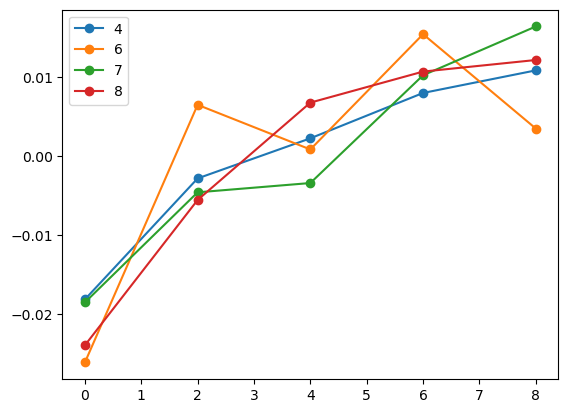

0
2
3
5
10
11
14
15


(-0.02, 0.02)

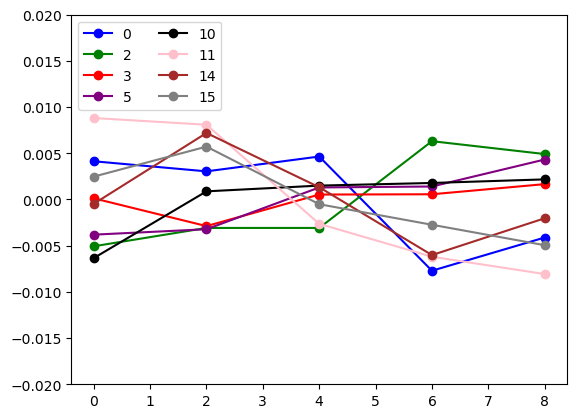

In [ ]:
drift=[4,6, 7, 8, ]
no_drift=[0, 2, 3, 5, 10, 11, 14, 15]

for j in drift:
    print(j)
    plt.plot(np.arange(5) * 2,  (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', marker='o',label='{}'.format(j))
    plt.legend()

plt.show()

for j in no_drift:
    print(j)
    plt.plot(np.arange(5) * 2, (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', color=colors[channel_idx[j]], label='{}'.format(j))
    plt.legend(loc='upper left', ncol=2)
plt.ylim(-0.02, 0.02)